### Домашнее задание №1 к лекции «Базовые понятия статистики»

In [1]:
import pandas as pd
import numpy as np
from random import sample
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

#### Задание 1
Загрузка данных
Изучить представленный набор данных на основе описания его столбцов, загрузить его и оставить 8 столбцов для дальнейшего изучения: __surgery?, age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome.__

| название | русское название | допустимые значения | тип |
|--------- | ---------- |--------- | ---------- |
| surgery?| была ли операция | 1 да<br>2 нет | качественный |
| age| возраст | любой<br>адекватный| количественный дискретный |
| rectal temperature| температура в попе | 37.8 норм | количественный непрерывный |
| pulse| пульс | 30-40 | количественный дискретный |
| respiratory rate| частота дыхания | 8-10 | количественный дискретный |
| temperature of extremities| температура конечностей | 1 норм<br>2 горячие<br>3 прохладные<br>4 холодные | качественный |
| pain| боль |1 боли нет<br>2 депрессия<br>3 редкая легкая боль<br>4 редкая сильная боль<br>5 постоянная сильная боль | качественный |
| outcome| причина списания  | 1 жив<br>2 умер<br>3 усыплен | качественный |

In [2]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv',
    header=None,
    usecols=[0, 1, 3, 4, 5, 6, 10, 22],
    names=['surgery',
           'age',
           'rectal_temperature',
           'pulse',
           'respiratory_rate',
           'temperature_of_extremities',
           'pain',
           'outcome'], 
    na_values='?')

In [3]:
df.head()

,surgery,age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     299 non-null    float64
 1   age                         300 non-null    int64  
 2   rectal_temperature          240 non-null    float64
 3   pulse                       276 non-null    float64
 4   respiratory_rate            242 non-null    float64
 5   temperature_of_extremities  244 non-null    float64
 6   pain                        245 non-null    float64
 7   outcome                     299 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


- В таблице 300 строк. 
- Кроме `age` во всех столбцах есть пропуски.  
- Все столбцы и качественные и количественные дискретные представлены как `float64`, только __age__ `int`. Это потому что `int` не может быть пустым. 
- Приводить все качественные и количественные дискретные к `int` пока не будем, это все равно ни к чему не приведет.
- Качественные столбцы приводить к `object` тоже пока рано, этот тип сложен в обработке.

#### Задание 2  
Первичное изучение данных  
Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

По качественным столбцам выводить статистики смысла мало. Выведем только по количественным, но добавим 5 и 95 персентили

In [5]:
def print_stat(df):
    col_list = ['age', 'rectal_temperature', 'pulse', 'respiratory_rate']

    stat = df[col_list].describe(percentiles=[.05, .25, .5, .75, .95]).T
    display(stat)

    plt.figure(figsize=(18,5))
    sns.boxplot(data=df[col_list], 
                orient='h', showfliers=True, showmeans=True,
                meanprops={'marker':'o', 
                           'markerfacecolor':'white', # Добавим белую точку - среднюю
                           'markeredgecolor':'black', 
                           'markersize':'10'})
    plt.title('Боксплоты по количественным признакам')
    plt.xlabel('Значения наблюдений')
    plt.ylabel('')
    plt.show()

,count,mean,std,min,5%,25%,50%,75%,95%,max
age,300.0,1.640000,2.173972,1.0,1.0,1.0,1.0,1.0,9.0,9.0
rectal_temperature,240.0,38.167917,0.732289,35.4,37.1,37.8,38.2,38.5,39.4,40.8
pulse,276.0,71.913043,28.630557,30.0,40.0,48.0,64.0,88.0,125.0,184.0
respiratory_rate,242.0,30.417355,17.642231,8.0,12.0,18.5,24.5,36.0,69.9,96.0


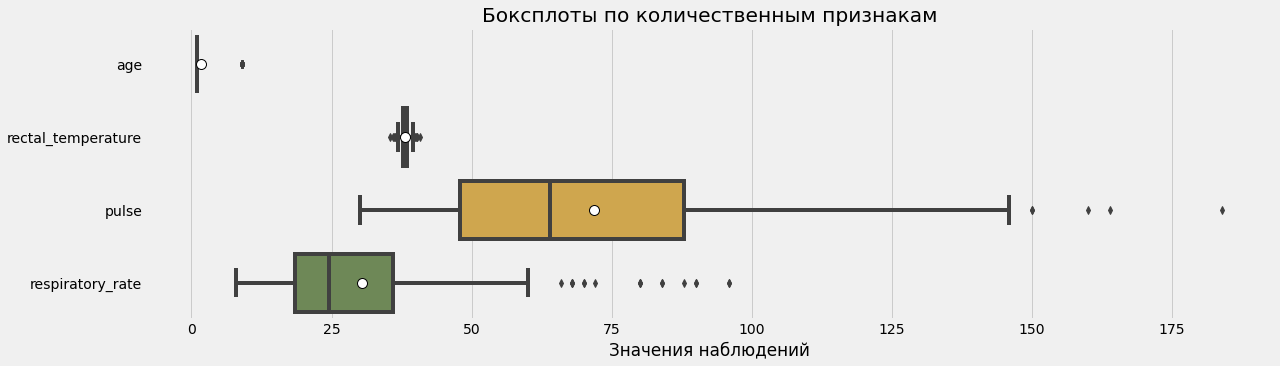

In [6]:
print_stat(df)

В таблице пока выделяется выброс в возрасте - 9-летние лошади, по остальным надо присматриваться.  
Для наглядности выводим ящики с усами по количественным столбцам

В итоге:
- В столбце __age__ таки __1__ выброс - 9. 
- В столбце __rectal_temperature__ размах крайне мал, поэтому и выбросы не так очевидны, и "прижаты" к центру. Температура обычно распределена нормально, следовательно выбросы двусторонние.
- В столбце __pulse__ __4__ выброса в большую сторону. На графике они смещают среднюю от медианы влево
- В столбце __respiratory_rate__ выбросы тоже есть __9__ шт в большую сторону.
-----
Выведем уникальные значения выбросов по каждому количественному столбцу

In [7]:
iqr = df.quantile(.75) - df.quantile(.25)
low, high = df.quantile(.25) - 1.5 * iqr, df.quantile(.75) + 1.5 * iqr
print('-'*85)

for i in df.columns:
    outlier = set(df.loc[(df[i] < low[i]) | (df[i] > high[i])][i])
    print(f'{i} - {len(outlier)} шт - ', *outlier)

-------------------------------------------------------------------------------------
surgery - 0 шт - 
age - 1 шт -  9
rectal_temperature - 12 шт -  35.4 36.4 36.5 36.0 39.7 40.3 39.9 39.6 36.1 36.6 40.8 40.0
pulse - 4 шт -  160.0 164.0 150.0 184.0
respiratory_rate - 9 шт -  96.0 66.0 68.0 70.0 72.0 80.0 84.0 88.0 90.0
temperature_of_extremities - 0 шт - 
pain - 0 шт - 
outcome - 0 шт - 


#### Задание 3. Работа с пропусками   
Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.

Соберем функцию для выведения инфо и визуализацию пропусков

In [8]:
def print_missing_data(df):
    """
    Функция на вход примает датафрейм
    на выходе стандартное инфо и тепловая карта с выбросами
    """
    df.info()
    plt.figure(figsize=(9, 4))
    colours = ['#000099', '#ffff00'] 
    sns.heatmap(df[df.columns].isnull().T, cmap=sns.color_palette(colours), cbar=False)
    plt.show()

Посмотрим на количество пропусков и какую долю они занимают в данных

In [9]:
pd.concat([
    df.isna().sum().rename('cnt'), 
    round((df.isna().mean() * 100),2).rename('%')], 
    axis=1)

,cnt,%
surgery,1,0.33
age,0,0.00
rectal_temperature,60,20.00
pulse,24,8.00
respiratory_rate,58,19.33
temperature_of_extremities,56,18.67
pain,55,18.33
outcome,1,0.33


Из всех столбцов __age__ самый заполненный. В __surgery__ и __outcome__ по одному пропуску. Возможно это одна и та же лошадь. Среди остальных столбцов наименее пострадавший это __pulse__. Заполним пропуски медианой, рассчитанной для каждого статуса __outcome__ выбывшей лошади

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     299 non-null    float64
 1   age                         300 non-null    int64  
 2   rectal_temperature          240 non-null    float64
 3   pulse                       276 non-null    float64
 4   respiratory_rate            242 non-null    float64
 5   temperature_of_extremities  244 non-null    float64
 6   pain                        245 non-null    float64
 7   outcome                     299 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


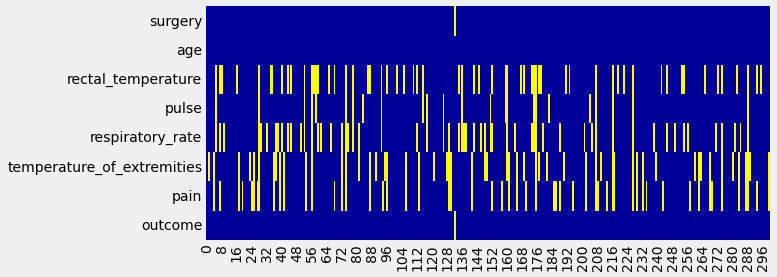

In [10]:
print_missing_data(df)

In [11]:
df.loc[df['pulse'].isnull(), 
       'pulse'] = df.groupby('outcome')['pulse'].transform(lambda x: int(x.mean()))
# если медиана придется по середине приведем к целому. пульс не может быть половинчатым

Заполнять пропуски на основании наличия операций или возраста не лучший вариант так как у этих столбцов низкая вариативность.  
Попробуем восстановить данные по значениям пульса. Логично что температура ног и дыхание и боль зависит именно от него.  
Для этого разобьем пульсы лошадей на 6 бинов. На основании них и будем заполнять пропуски остальных столбцов

In [12]:
df['pulse_type'] = pd.cut(df['pulse'], bins=6, labels=False)
df.groupby('pulse_type').agg({'pulse':'unique'})

,pulse
pulse_type,
0,"[40.0, 48.0, 42.0, 52.0, 46.0, 54.0, 38.0, 50...."
1,"[66.0, 63.0, 60.0, 80.0, 72.0, 76.0, 64.0, 56...."
2,"[88.0, 104.0, 90.0, 92.0, 96.0, 87.0, 100.0, 8..."
3,"[128.0, 110.0, 130.0, 108.0, 112.0, 120.0, 114..."
4,"[146.0, 150.0, 140.0, 136.0]"
5,"[164.0, 160.0, 184.0]"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     299 non-null    float64
 1   age                         300 non-null    int64  
 2   rectal_temperature          240 non-null    float64
 3   pulse                       300 non-null    float64
 4   respiratory_rate            242 non-null    float64
 5   temperature_of_extremities  244 non-null    float64
 6   pain                        245 non-null    float64
 7   outcome                     299 non-null    float64
 8   pulse_type                  300 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 21.2 KB


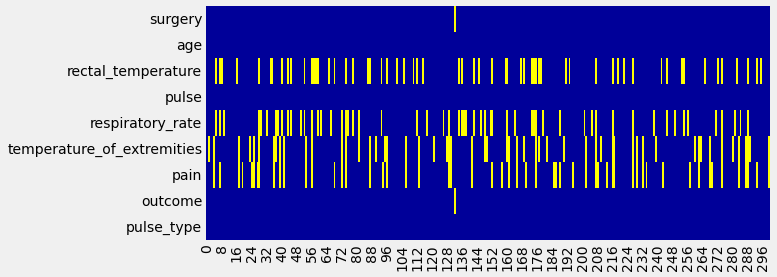

In [13]:
print_missing_data(df)

Для оставшихся столбцов с применим следующую логику.  
Сгруппируем по столбцу __pulse_type__ нужный столбец в своей агрегации
Полученным значением заполним пропуски в каждой соответствующей группе. 
- для температуры это __медиана__ чтобы исключить возможные выбросы в подгруппах
- для температуры конечностей, боли, частоты дыхания самое частое значение - __мода__ т.к. это качественные характеристики

Мод может быть несколько. Для получения случайной моды напишем `lambda` функцию  

Для заполнения пропусков в группах рассчитанными агрегатами из существующих значений этих групп используем комбинацию `groupby + transform`

In [14]:
random_mode = lambda x: sample(list(x.mode()),1)[0] if x.count() !=0 else np.nan
# На вход принимаем объект pandas.core.groupby.generic.SeriesGroupBy object, 
# 1) получаем серию мод, преобразуем эту серию в список
# 2) возвращаем из этого списка одно случайное значение
# 3) в случае если серия мод пустая возвращаем числовой nan
# 4) применять с apply, aggregate или transform

In [15]:
df.loc[df['rectal_temperature'].isnull(), 
       'rectal_temperature'] = df.groupby('pulse_type')['rectal_temperature'].transform('mean')
df.loc[df['temperature_of_extremities'].isna(), 
       'temperature_of_extremities'] = df.groupby('pulse_type')['temperature_of_extremities'].transform(random_mode)
df.loc[df['pain'].isna(), 
       'pain'] = df.groupby('pulse_type')['pain'].transform(random_mode)
df.loc[df['respiratory_rate'].isna(), 
       'respiratory_rate'] = df.groupby('pulse_type')['respiratory_rate'].transform(random_mode)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     299 non-null    float64
 1   age                         300 non-null    int64  
 2   rectal_temperature          300 non-null    float64
 3   pulse                       300 non-null    float64
 4   respiratory_rate            300 non-null    float64
 5   temperature_of_extremities  300 non-null    float64
 6   pain                        300 non-null    float64
 7   outcome                     299 non-null    float64
 8   pulse_type                  300 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 21.2 KB


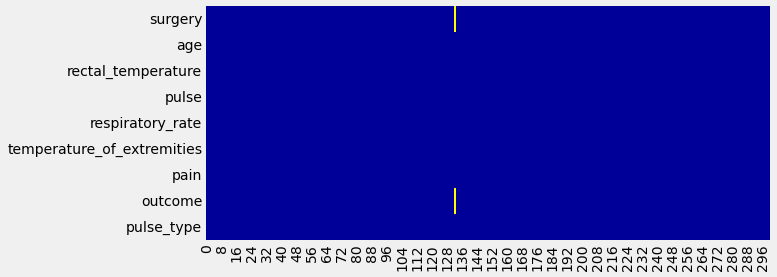

In [16]:
print_missing_data(df)

В итоге мы теряем единственную лошадь у которой неизвестны наличие операций и выбытие

In [17]:
df.dropna(inplace=True)

In [18]:
for i in ['surgery','age', 'pulse', 'respiratory_rate','temperature_of_extremities', 'pain', 'outcome']:
    df[i] = df[i].astype("int")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 299
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     299 non-null    int64  
 1   age                         299 non-null    int64  
 2   rectal_temperature          299 non-null    float64
 3   pulse                       299 non-null    int64  
 4   respiratory_rate            299 non-null    int64  
 5   temperature_of_extremities  299 non-null    int64  
 6   pain                        299 non-null    int64  
 7   outcome                     299 non-null    int64  
 8   pulse_type                  299 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 23.4 KB


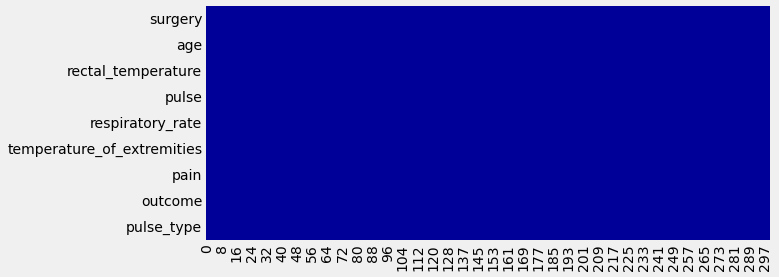

In [19]:
print_missing_data(df)

,count,mean,std,min,5%,25%,50%,75%,95%,max
age,299.0,1.642140,2.177300,1.0,1.0,1.0,1.0,1.0,9.0,9.0
rectal_temperature,299.0,38.182265,0.661761,35.4,37.2,37.9,38.2,38.5,39.3,40.8
pulse,299.0,72.220736,27.682247,30.0,40.0,48.5,64.0,88.0,124.0,184.0
respiratory_rate,299.0,28.779264,16.357113,8.0,12.0,20.0,24.0,36.0,68.0,96.0


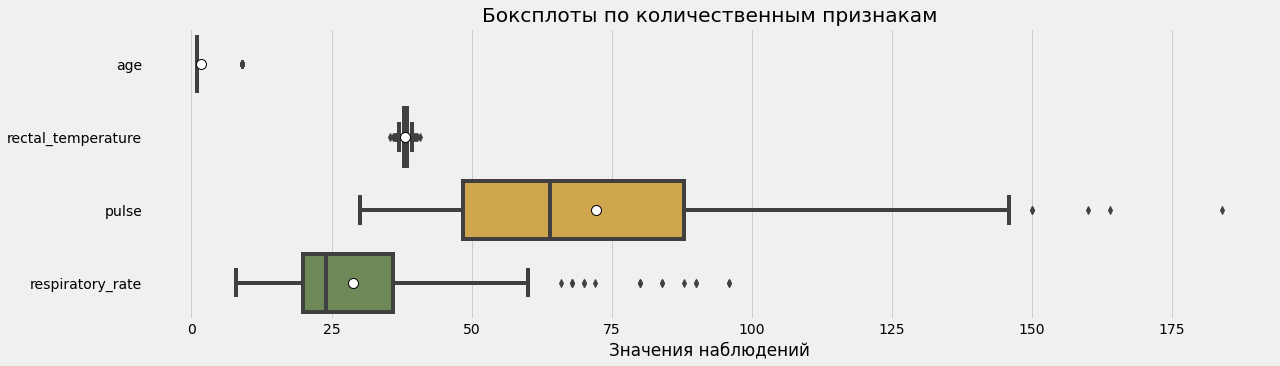

In [20]:
print_stat(df)

Как видно на графиках наши преобразования не особо изменили основные статистики. Графики так же принципиально не изменились.